# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

585

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# set up lists to hold reponse info
lat = []
lng = []
cloud = []
country = []
date = []
humidity = []
wind =[]
maxtemp = []
newcities = []

print("Beginning Data Retrieval")
print("------------------------------")
# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])
        cloud.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        print(f'Processing Record {cities.index(city)} of Set 1| {city}')
    except (KeyError, IndexError):
        print("City not found. Skipping...")
        print(city)
        newcities.append(city)
print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")



Beginning Data Retrieval
------------------------------
Processing Record 0 of Set 1| avarua
Processing Record 1 of Set 1| ozinki
Processing Record 2 of Set 1| lebu
Processing Record 3 of Set 1| batie
Processing Record 4 of Set 1| albany
Processing Record 5 of Set 1| rikitea
Processing Record 6 of Set 1| beloha
Processing Record 7 of Set 1| deputatskiy
Processing Record 8 of Set 1| frolovo
Processing Record 9 of Set 1| bethel
Processing Record 10 of Set 1| ribeira grande
Processing Record 11 of Set 1| east london
Processing Record 12 of Set 1| flin flon
Processing Record 13 of Set 1| ponta do sol
Processing Record 14 of Set 1| sept-iles
Processing Record 15 of Set 1| jucuaran
Processing Record 16 of Set 1| hobart
Processing Record 17 of Set 1| busselton
Processing Record 18 of Set 1| mataura
Processing Record 19 of Set 1| port elizabeth
Processing Record 20 of Set 1| palora
Processing Record 21 of Set 1| hermanus
Processing Record 22 of Set 1| mato verde
Processing Record 23 of Set 1| 

Processing Record 202 of Set 1| inuvik
City not found. Skipping...
formoso do araguaia
City not found. Skipping...
naral
Processing Record 205 of Set 1| nemuro
Processing Record 206 of Set 1| sabang
Processing Record 207 of Set 1| luanda
Processing Record 208 of Set 1| omboue
City not found. Skipping...
bokspits
Processing Record 210 of Set 1| kavieng
Processing Record 211 of Set 1| harper
Processing Record 212 of Set 1| khandyga
City not found. Skipping...
olafsvik
Processing Record 214 of Set 1| riyadh
Processing Record 215 of Set 1| shahr-e babak
Processing Record 216 of Set 1| novopokrovka
City not found. Skipping...
waw
City not found. Skipping...
acuna
Processing Record 219 of Set 1| coquimbo
Processing Record 220 of Set 1| alofi
Processing Record 221 of Set 1| jacmel
Processing Record 222 of Set 1| yar-sale
Processing Record 223 of Set 1| blackwater
Processing Record 224 of Set 1| antofagasta
Processing Record 225 of Set 1| victor harbor
City not found. Skipping...
barentsburg
P

Processing Record 404 of Set 1| clyde river
Processing Record 405 of Set 1| ilulissat
Processing Record 406 of Set 1| kalmunai
City not found. Skipping...
viligili
Processing Record 408 of Set 1| emba
Processing Record 409 of Set 1| bolshaya glushitsa
City not found. Skipping...
palabuhanratu
City not found. Skipping...
tahta
City not found. Skipping...
phan rang
Processing Record 413 of Set 1| yarada
City not found. Skipping...
warqla
Processing Record 415 of Set 1| buchanan
Processing Record 416 of Set 1| songjianghe
Processing Record 417 of Set 1| pallisa
Processing Record 418 of Set 1| vaitape
Processing Record 419 of Set 1| dubbo
Processing Record 420 of Set 1| margate
Processing Record 421 of Set 1| ostrovnoy
Processing Record 422 of Set 1| estelle
Processing Record 423 of Set 1| camacha
Processing Record 424 of Set 1| horodyshche
Processing Record 425 of Set 1| jiexiu
Processing Record 426 of Set 1| umm kaddadah
Processing Record 427 of Set 1| manokwari
City not found. Skipping.

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [39]:
unwantedcities = {"New City": newcities}
cities = [x for x in cities if x not in (unwantedcities)]
print(len(cities), len(cloud), len(country), 
      len(date), len(humidity), len(lat), 
      len(lng), len(maxtemp),len(wind))


# create a data frame from cities, lat, etc
cityweather_dict = {
    "City": cities,
    "Cloudiness": cloud,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": maxtemp,
    "Wind Speed": wind
}


525 525 525 525 525 525 525 525 525


In [40]:
cityweather_data = pd.DataFrame(cityweather_dict)

#export data into a .csv
cityweather_data.to_csv('output_data/cities.csv', index = None, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [41]:
cityweather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,yulara,90,CK,1567633128,57,-21.21,-159.78,77.00,19.46
1,vila,0,RU,1567633128,68,51.20,49.73,53.51,5.70
2,luanda,75,ET,1567633128,87,8.96,38.73,60.80,2.24
3,kaitangata,0,FR,1567633128,76,45.06,5.82,71.01,5.82
4,kralendijk,20,US,1567632926,54,42.65,-73.75,81.00,17.22


#### Latitude vs. Temperature Plot

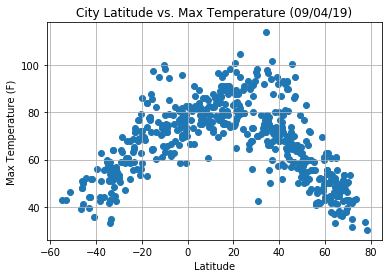

In [42]:
# Build a scatter plot for each data type
plt.scatter(cityweather_data["Lat"], cityweather_data["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (09/04/19)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("CityLatitudevsMaxTemperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

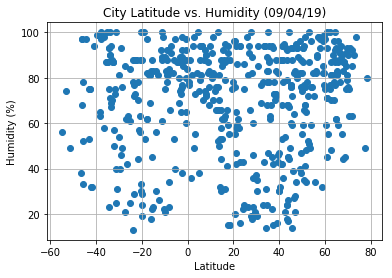

In [43]:
# Build a scatter plot for each data type
plt.scatter(cityweather_data["Lat"], cityweather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (09/04/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("CityLatitudevsHumidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

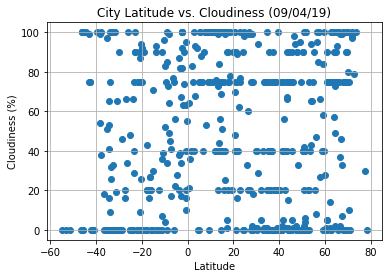

In [44]:
# Build a scatter plot for each data type
plt.scatter(cityweather_data["Lat"], cityweather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (09/04/19)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudevsCloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

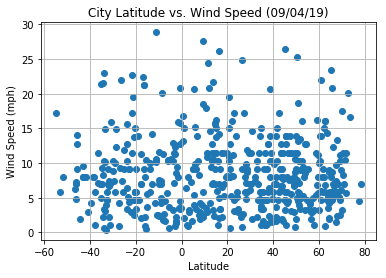

In [45]:
# Build a scatter plot for each data type
plt.scatter(cityweather_data["Lat"], cityweather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (09/04/19)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudevsWindSpeed.png")

# Show plot
plt.show()

In [ ]:
#3 Observable Trends
 
#The highest max temperature is around the equator and much lower as we get further from the equator. Surprisingly, the max temperature seems equal at -60 and 60 degrees Latitude, creating a perfect bell curve. 
#Humidity is concentrated around 60 degrees Latitude on September 4th, 2019. This is the summer season in the north, with both temperature and humidity very high.
#Wind Speed is highest around the 60 degrees Latitude on September 4th, 2019. There is a hurricane currently near North Carolina, so the entire upper Atlantic Ocean is affected by high winds.